<a href="https://colab.research.google.com/github/ckraju/mits/blob/master/kiet-simple-rock-paper-scissor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install -U -q PyDrive

In [2]:
zip_id = '1a_1IF1Rp1XeEPKeIZkJ1_OwN9Eh4bdqk'

In [3]:
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
import zipfile, os

In [4]:
# 1. Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)


In [12]:
if not os.path.exists('tmp'):
    os.makedirs('tmp')
    os.makedirs('tmp/train')


In [13]:
# 2. Download Zip
#print ("Downloading zip file")
#myzip = drive.CreateFile({'id': zip_id})
#myzip.GetContentFile('rps.zip')
!wget https://storage.googleapis.com/laurencemoroney-blog.appspot.com/rps.zip

--2022-07-15 05:14:20--  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/rps.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.24.128, 142.251.12.128, 172.217.194.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.24.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 200682221 (191M) [application/zip]
Saving to: ‘rps.zip.1’

rps.zip.1           100%[===================>] 191.38M  51.3MB/s    in 3.7s    

2022-07-15 05:14:25 (51.3 MB/s) - ‘rps.zip.1’ saved [200682221/200682221]



In [14]:
# 3. Unzip
print ("Uncompressing zip file")
zip_ref = zipfile.ZipFile('rps.zip', 'r')
zip_ref.extractall('tmp/train/')
zip_ref.close()

Uncompressing zip file


In [15]:
rock_dir = os.path.join('tmp/train/rps/rock')
paper_dir = os.path.join('tmp/train/rps/paper')
scissors_dir = os.path.join('tmp/train/rps/scissors')

print('total training rock images:', len(os.listdir(rock_dir)))
print('total training paper images:', len(os.listdir(paper_dir)))
print('total training scissors images:', len(os.listdir(scissors_dir)))

rock_files = os.listdir(rock_dir)
print(rock_files[:10])

paper_files = os.listdir(paper_dir)
print(paper_files[:10])

scissors_files = os.listdir(scissors_dir)
print(scissors_files[:10])

total training rock images: 840
total training paper images: 840
total training scissors images: 840
['rock01-028.png', 'rock04-075.png', 'rock06ck02-071.png', 'rock07-k03-089.png', 'rock06ck02-056.png', 'rock05ck01-055.png', 'rock03-108.png', 'rock06ck02-098.png', 'rock02-070.png', 'rock03-006.png']
['paper04-068.png', 'paper05-099.png', 'paper06-011.png', 'paper06-023.png', 'paper04-032.png', 'paper07-105.png', 'paper03-113.png', 'paper03-118.png', 'paper07-019.png', 'paper01-111.png']
['scissors04-048.png', 'testscissors02-020.png', 'scissors01-019.png', 'scissors03-100.png', 'scissors01-093.png', 'testscissors02-010.png', 'scissors03-097.png', 'testscissors03-071.png', 'scissors02-021.png', 'testscissors01-056.png']


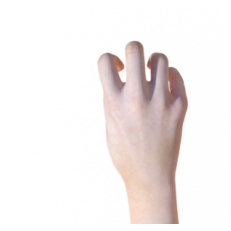

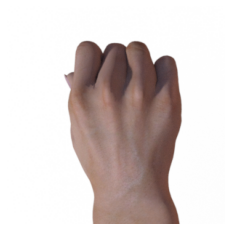

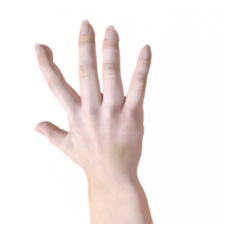

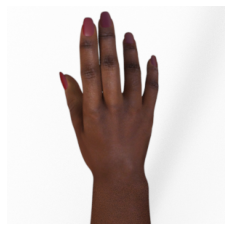

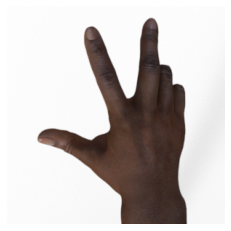

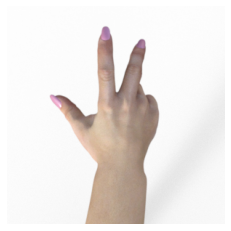

In [16]:
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

pic_index = 2

next_rock = [os.path.join(rock_dir, fname) 
                for fname in rock_files[pic_index-2:pic_index]]
next_paper = [os.path.join(paper_dir, fname) 
                for fname in paper_files[pic_index-2:pic_index]]
next_scissors = [os.path.join(scissors_dir, fname) 
                for fname in scissors_files[pic_index-2:pic_index]]

for i, img_path in enumerate(next_rock+next_paper+next_scissors):
  #print(img_path)
  img = mpimg.imread(img_path)
  plt.imshow(img)
  plt.axis('Off')
  plt.show()

In [17]:
!wget https://storage.googleapis.com/laurencemoroney-blog.appspot.com/rps-test-set.zip

--2022-07-15 05:16:12--  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/rps-test-set.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.68.128, 172.253.118.128, 74.125.24.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.68.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 29516758 (28M) [application/zip]
Saving to: ‘rps-test-set.zip’

rps-test-set.zip    100%[===================>]  28.15M  24.1MB/s    in 1.2s    

2022-07-15 05:16:15 (24.1 MB/s) - ‘rps-test-set.zip’ saved [29516758/29516758]



In [18]:
# 3. Unzip
print ("Uncompressing zip file")
zip_ref = zipfile.ZipFile('rps-test-set.zip', 'r')
zip_ref.extractall('tmp/test/')
zip_ref.close()

Uncompressing zip file


In [20]:
# Over to test data for validation
rock_dir = os.path.join('tmp/test/rps-test-set/rock')
paper_dir = os.path.join('tmp/test/rps-test-set/paper')
scissors_dir = os.path.join('tmp/test/rps-test-set/scissors')

print('total testing rock images:', len(os.listdir(rock_dir)))
print('total testing paper images:', len(os.listdir(paper_dir)))
print('total testing scissors images:', len(os.listdir(scissors_dir)))

rock_files = os.listdir(rock_dir)
print(rock_files[:10])

paper_files = os.listdir(paper_dir)
print(paper_files[:10])

scissors_files = os.listdir(scissors_dir)
print(scissors_files[:10])

total testing rock images: 124
total testing paper images: 124
total testing scissors images: 124
['testrock02-04.png', 'testrock02-07.png', 'testrock02-19.png', 'testrock01-21.png', 'testrock03-07.png', 'testrock01-25.png', 'testrock04-29.png', 'testrock03-19.png', 'testrock01-08.png', 'testrock04-06.png']
['testpaper02-26.png', 'testpaper01-16.png', 'testpaper03-13.png', 'testpaper03-01.png', 'testpaper03-06.png', 'testpaper01-30.png', 'testpaper04-01.png', 'testpaper02-28.png', 'testpaper04-28.png', 'testpaper01-10.png']
['testscissors02-06.png', 'testscissors03-04.png', 'testscissors02-07.png', 'testscissors03-28.png', 'testscissors04-21.png', 'testscissors03-18.png', 'testscissors01-17.png', 'testscissors03-01.png', 'testscissors04-10.png', 'testscissors03-26.png']


In [21]:
import tensorflow as tf
import keras_preprocessing
from keras_preprocessing import image
from keras_preprocessing.image import ImageDataGenerator

In [22]:
TRAINING_DIR = "tmp/train/rps/"
training_datagen = ImageDataGenerator(
      rescale = 1./255,
	  rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

VALIDATION_DIR = "tmp/test/rps-test-set/"
validation_datagen = ImageDataGenerator(rescale = 1./255)

train_generator = training_datagen.flow_from_directory(
	TRAINING_DIR,
	target_size=(150,150),
	class_mode='categorical'
)

validation_generator = validation_datagen.flow_from_directory(
	VALIDATION_DIR,
	target_size=(150,150),
	class_mode='categorical'
)

Found 2520 images belonging to 3 classes.
Found 372 images belonging to 3 classes.


In [23]:
model = tf.keras.models.Sequential([
    # Note the input shape is the desired size of the image 150x150 with 3 bytes color
    # This is the first convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    # The second convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The third convolution
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The fourth convolution
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # Flatten the results to feed into a DNN
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.5),
    # 512 neuron hidden layer
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax')
])

In [24]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 64)      1792      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 36, 36, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 17, 17, 128)      0

In [ ]:
model.compile(loss = 'categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

history = model.fit_generator(train_generator, epochs=25, validation_data = validation_generator, verbose = 1)

model.save("rps.h5")

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  This is separate from the ipykernel package so we can avoid doing imports until


Epoch 1/25
79/79 [==============================] - 35s 276ms/step - loss: 1.2058 - accuracy: 0.3615 - val_loss: 1.0582 - val_accuracy: 0.3333
Epoch 2/25
79/79 [==============================] - 23s 291ms/step - loss: 0.8718 - accuracy: 0.5802 - val_loss: 0.4537 - val_accuracy: 0.9059
Epoch 3/25
79/79 [==============================] - 21s 260ms/step - loss: 0.5733 - accuracy: 0.7647 - val_loss: 0.2013 - val_accuracy: 0.9543
Epoch 4/25
49/79 [=================>............] - ETA: 7s - loss: 0.4313 - accuracy: 0.8276

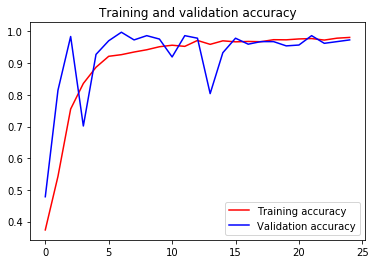

<Figure size 432x288 with 0 Axes>

In [ ]:
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()


plt.show()



In [ ]:
import numpy as np
from google.colab import files
from keras.preprocessing import image

uploaded = files.upload()

for fn in uploaded.keys():
 
  # predicting images
  path = fn
  img = image.load_img(path, target_size=(150, 150))
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)
  print(fn)
  print(classes)

Using TensorFlow backend.


Saving testpaper04-14.png to testpaper04-14.png
testpaper04-14.png
[[1. 0. 0.]]
